## Summary:

- 1) quick data dynamic analysis
- 2) models:
    - 2.1) logistic regression
    - 2.2) random forest
    - 2.3) artificial neural network with cross validation
- 3) table results and comments  

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [8]:
dataset = pd.read_csv("df_points.txt", delimiter="\t")
dataset.head()

,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0
1,1,-314.287214,307.276723,-179.037412,1.0
2,2,-328.208910,181.627758,446.311062,1.0
3,3,-148.658890,147.027947,-27.477959,1.0
4,4,-467.065931,250.467651,-306.475330,1.0


## 1) Quick data dynamic analysis

In [9]:
# to see if the dataset is balanced
dataset.label.value_counts()

1.0    5027
0.0    4973
Name: label, dtype: int64

Text(0.5, 1.0, 'Data dynamic')

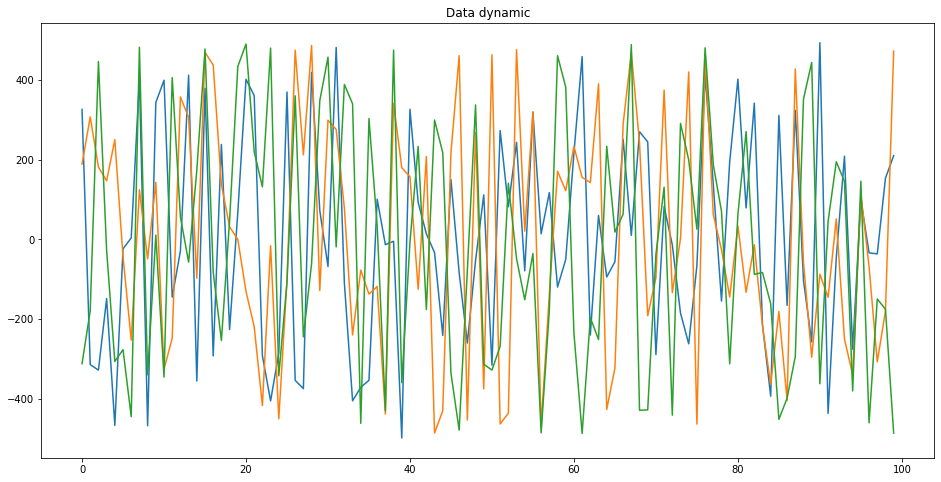

In [10]:
# Analyzing data dynamic
plt.figure(figsize=(16,8))
plt.plot(dataset["Unnamed: 0"][0:100], dataset["x"][0:100])
plt.plot(dataset["Unnamed: 0"][0:100], dataset["y"][0:100])
plt.plot(dataset["Unnamed: 0"][0:100], dataset["z"][0:100])
plt.title("Data dynamic")


With this plot it's possible to see that the data has a nonlinear aspect.

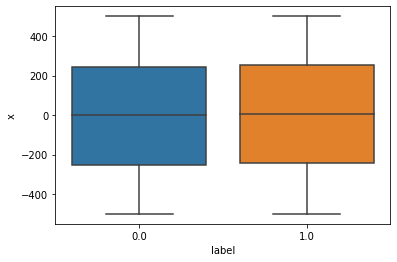

In [11]:
box_plot_x = sns.boxplot(x="label", y=dataset["x"], data=dataset)

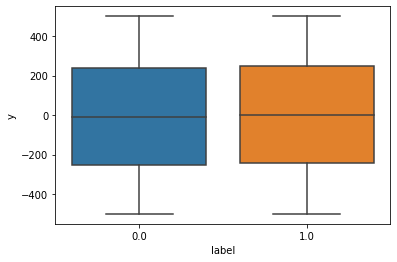

In [12]:
box_plot_x = sns.boxplot(x="label", y=dataset["y"], data=dataset)

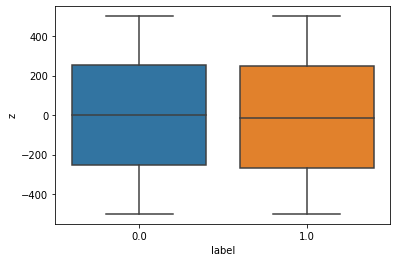

In [13]:
box_plot_x = sns.boxplot(x="label", y=dataset["z"], data=dataset)

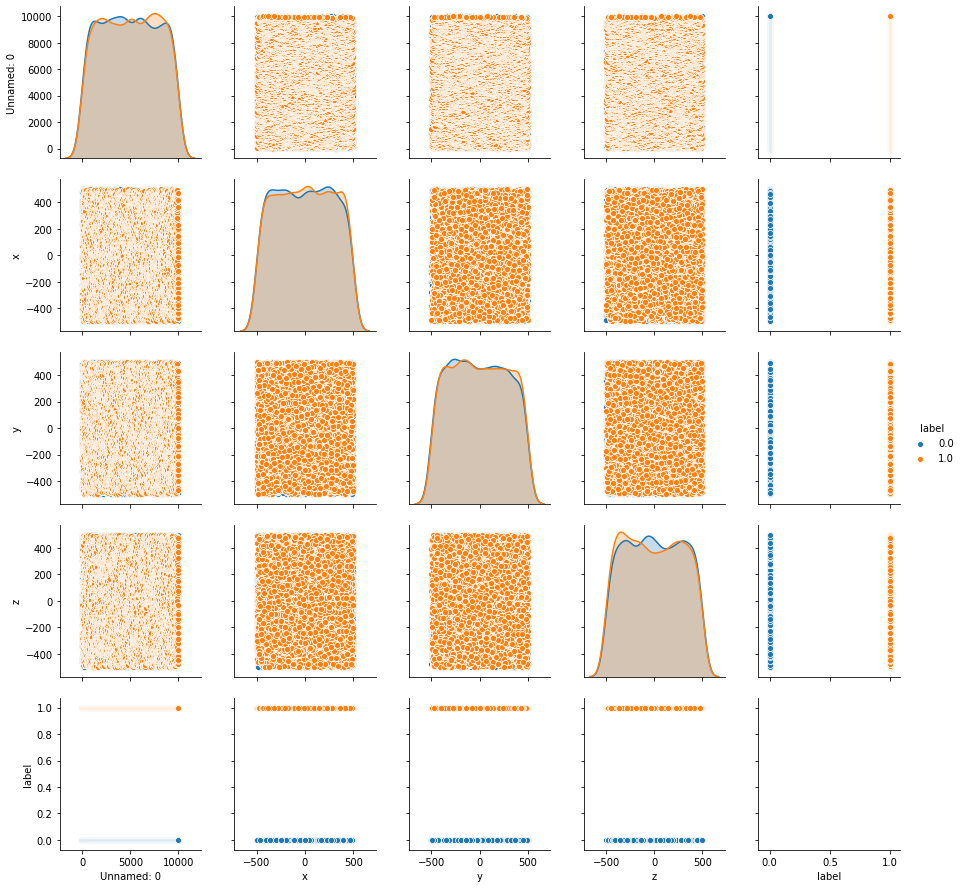

In [14]:
sns.pairplot(dataset, hue='label');

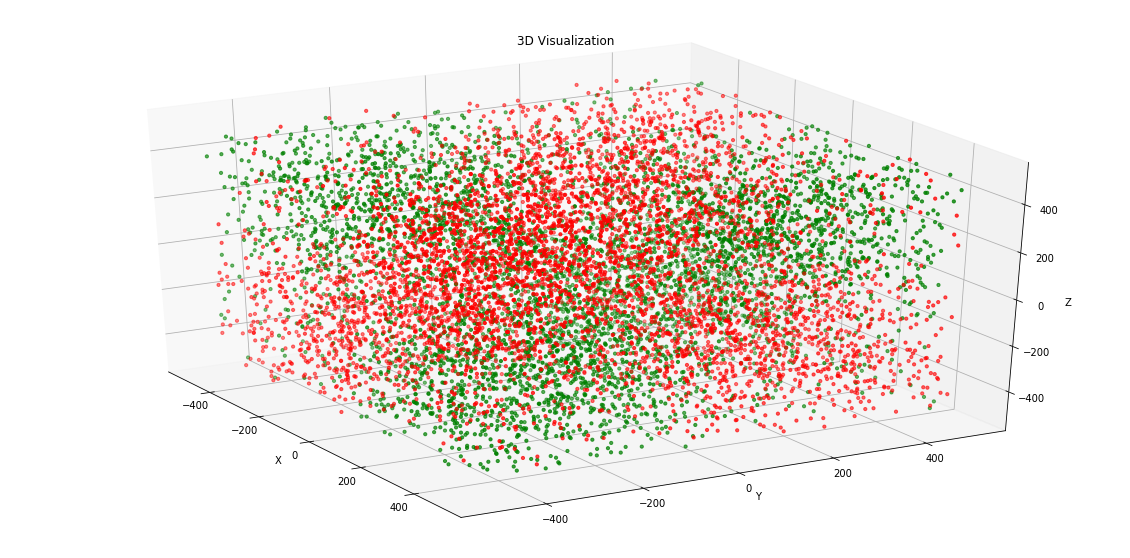

In [15]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset.x.loc[dataset.label == 1], dataset.y.loc[dataset.label == 1], dataset.z.loc[dataset.label == 1], c='green', s=10)
ax.scatter(dataset.x.loc[dataset.label == 0], dataset.y.loc[dataset.label == 0], dataset.z.loc[dataset.label == 0], c='red', s=10)
ax.set_title("3D Visualization")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(30, -30)
plt.show()

----------------------

# 2) Models

#### a) Segregate a test and training frame. 

In [5]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 2.1) Logistic Regression

#### b) Use a GLM or Logistic Regression model and show the results.

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_lr = sc.fit_transform(X_train)
X_test_lr = sc.transform(X_test)

In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train_lr, y_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test_lr)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
print("Confusion matrix:")
print(cm_lr)

#Accuracy
Accuracy_lr = (tn_lr+tp_lr)/(tp_lr+tn_lr+fp_lr+fn_lr) 
print("Accuracy: {:0.2f}".format(Accuracy_lr))

#precision
Precision_lr = (tp_lr)/(tp_lr+fp_lr) 
print("Precision: {:0.5f}".format(Precision_lr))

#Recall 
Recall_lr = tp_lr/(tp_lr+fn_lr) 
print("Recall: {:0.2f}".format(Recall_lr))

#F1 Score
f1_lr = (2*Precision_lr*Recall_lr)/(Precision_lr + Recall_lr)
print("F1 Score {:0.2f}".format(f1_lr))

Confusion matrix:
[[394 886]
 [336 884]]
Accuracy: 0.51
Precision: 0.49944
Recall: 0.72
F1 Score 0.59


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


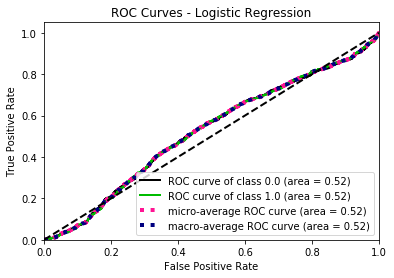

In [9]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = classifier_lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.title("ROC Curves - Logistic Regression")
plt.show()

## 2.2) Random Forest 

#### c) Use other method of your choice to handle the problem 


In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# K-foldcross validation
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean_rf = accuracies_rf.mean()
variance_rf = accuracies_rf.std()

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
print("Confusion matrix:")
print(cm_rf)

#Accuracy
Accuracy_rf = (tn_rf+tp_rf)/(tp_rf+tn_rf+fp_rf+fn_rf) 
#precision
Precision_rf = (tp_rf)/(tp_rf+fp_rf) 
#Recall 
Recall_rf = tp_rf/(tp_rf+fn_rf) 
#F1 Score
f1_rf = (2*Precision_rf*Recall_rf)/(Precision_rf + Recall_rf)

df_rf = pd.DataFrame(dict([
    ("Random Forest", [mean_rf,variance_rf,Accuracy_rf,Precision_rf,Recall_rf,f1_rf])]),
    index=["Mean model accuracy","model variance","model accuracy","model precision","model recall", "model F1 score"])

df_rf

Confusion matrix:
[[985 295]
 [269 951]]


,Random Forest
Mean model accuracy,0.772401
model variance,0.014686
model accuracy,0.774400
model precision,0.763242
model recall,0.779508
model F1 score,0.771290


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


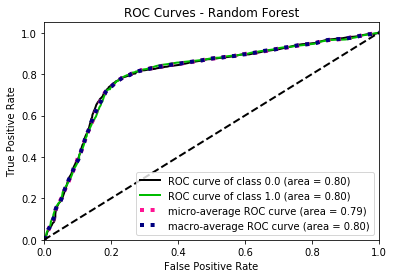

In [12]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = classifier_rf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.title("ROC Curves - Random Forest")
plt.show()

## 2.3) Artificial Neural Network

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train_ann = y_train
X_train_ann = sc.fit_transform(X_train)
X_test_ann = sc.transform(X_test)

# Importing the Keras libraries and packages
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout


def build_classifier():
    classifier_ann = Sequential()
    classifier_ann.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
    classifier_ann.add(Dropout(p=0.1))
    classifier_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_ann

Using TensorFlow backend.


In [14]:
# gred search - {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
classifier_ann = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100)

# K-foldcross validation
accuracies_ann = cross_val_score(estimator = classifier_ann, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean_ann = accuracies_ann.mean()
variance_ann = accuracies_ann.std()

y_pred_ann = classifier_ann.fit(X_train_ann, y_train_ann)
y_pred_ann = classifier_ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5) # defining threshold

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
7500/7500 [==============================] - 3s 425us/step - loss: 0.6926 - acc: 0.5347
Epoch 2/100
7500/7500 [==============================] - 1s 153us/step - loss: 0.6826 - acc: 0.6236
Epoch 3/100
7500/7500 [==============================] - 1s 146us/step - loss: 0.6546 - acc: 0.6595
Epoch 4/100
7500/7500 [==============================] - 1s 154us/step - loss: 0.6264 - acc: 0.6824
Epoch 5/100
7500/7500 [==============================] - 1s 145us/step - loss: 0.6106 - acc: 0.6861
Epoch 6/100
7500/7500 [==============================] - 1s 153us/step - loss: 0.6019 - acc: 0.6996
Epoch 7/100
7500/7500 [==============================] - 1s 152us/step - loss: 0.5972 - acc: 0.6961
Epoch 8/100
7500/7500 [==============================] - 1s 150us

7500/7500 [==============================] - 1s 153us/step - loss: 0.5673 - acc: 0.7329
Epoch 74/100
7500/7500 [==============================] - 1s 147us/step - loss: 0.5648 - acc: 0.7324
Epoch 75/100
7500/7500 [==============================] - 1s 147us/step - loss: 0.5649 - acc: 0.7305
Epoch 76/100
7500/7500 [==============================] - 1s 154us/step - loss: 0.5635 - acc: 0.7368
Epoch 77/100
7500/7500 [==============================] - 1s 148us/step - loss: 0.5635 - acc: 0.7363
Epoch 78/100
7500/7500 [==============================] - 1s 158us/step - loss: 0.5666 - acc: 0.7315
Epoch 79/100
7500/7500 [==============================] - 1s 145us/step - loss: 0.5619 - acc: 0.7367
Epoch 80/100
7500/7500 [==============================] - 1s 156us/step - loss: 0.5651 - acc: 0.7343
Epoch 81/100
7500/7500 [==============================] - 1s 148us/step - loss: 0.5650 - acc: 0.7375 1s - loss:
Epoch 82/100
7500/7500 [==============================] - 1s 153us/step - loss: 0.5620 - acc:

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_pred_ann).ravel()
print("Confusion matrix:")
print(cm_ann)

#Accuracy
Accuracy_ann = (tn_ann+tp_ann)/(tp_ann+tn_ann+fp_ann+fn_ann) 
#precision
Precision_ann = (tp_ann)/(tp_ann+fp_ann) 
#Recall 
Recall_ann = tp_ann/(tp_ann+fn_ann) 
#F1 Score
f1_ann = (2*Precision_ann*Recall_ann)/(Precision_ann + Recall_ann)

# table with ANN results
df_ann = pd.DataFrame(dict([
    ("Artificial Neural Network",[mean_ann,variance_ann,Accuracy_ann,Precision_ann,Recall_ann,f1_ann])]),
    index=["Mean model accuracy","model variance","model accuracy","model precision","model recall", "model F1 score"])
df_ann

Confusion matrix:
[[933 347]
 [291 929]]


,Artificial Neural Network
Mean model accuracy,0.771067
model variance,0.020904
model accuracy,0.744800
model precision,0.728056
model recall,0.761475
model F1 score,0.744391


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


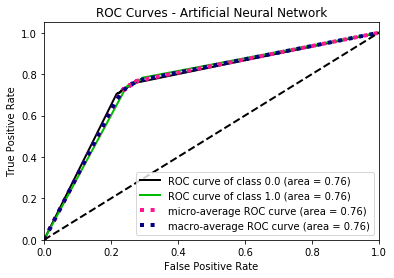

In [16]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = classifier_ann.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.title("ROC Curves - Artificial Neural Network")
plt.show()

### 2.3.1) Optimization of the ANN - grid search method

In [17]:
# parameter optimization (testing 20 model)

"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

"""

"\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.models import Sequential\nfrom keras.layers import Dense\ndef build_classifier(optimizer):\n    classifier = Sequential()\n    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))\n    classifier.add(Dropout(p=0.1))\n    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))\n    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])\n    return classifier\nclassifier = KerasClassifier(build_fn = build_classifier)\nparameters = {'batch_size': [25, 32],\n              'epochs': [100, 500],\n              'optimizer': ['adam', 'rmsprop']}\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n               

## Results Table | Comments

#### d) Compare and comment the results on the models used from b) and c) 

In [19]:
df_results = pd.DataFrame(dict([("logistic_regression",[Accuracy_lr,Precision_lr,Recall_lr]),
                                 ("random_forest",[Accuracy_rf,Precision_rf,Recall_rf]),
                                 ("ANN",[Accuracy_ann,Precision_ann,Recall_ann])]),
                                  index=['Acurracy',"Precision","Recall"])                
df_results

,logistic_regression,random_forest,ANN
Acurracy,0.511200,0.774400,0.744800
Precision,0.499435,0.763242,0.728056
Recall,0.724590,0.779508,0.761475


With the above table it's possible to see that the non-linear models, Random Forest and Artificial Neural Network, do better performence in this dataset. On the other hand, logistic regression model is almost like a flip coin model. This result can be justified because, usually, logistic regression models are used as linear classifier and the other two are most used to non-linear datasets.

In [20]:
df = pd.DataFrame(dict([
    ("Random Forest", [mean_rf,variance_rf,Accuracy_rf,Precision_rf,Recall_rf,f1_rf]),
    ("Artificial Neural Network",[mean_ann,variance_ann,Accuracy_ann,Precision_ann,Recall_ann,f1_ann])]),
    index=["Mean model accuracy","model variance","model accuracy","model precision","model recall", "model F1 score"])
df

,Random Forest,Artificial Neural Network
Mean model accuracy,0.772401,0.771067
model variance,0.014686,0.020904
model accuracy,0.774400,0.744800
model precision,0.763242,0.728056
model recall,0.779508,0.761475
model F1 score,0.771290,0.744391


In [21]:
print("Random forest predited {} false negatives and Ann predicted {} false negatives".format(fn_rf,fn_ann))

Random forest predited 269 false negatives and Ann predicted 291 false negatives


The above table shows that the Random Forest model is better for this problem because it shows better accuracy, precision, recall and low model variance. And also if we compare the false negatives between both models, it's possible to view that again Random Forest is better. I know it is arguable depending on each case, but it is more dangerous to say that the event will not occur and in the end it occurs than to say that it will occur and in the end does not occur. In the second situation you have time to prepare and in the first you are taken by surprise